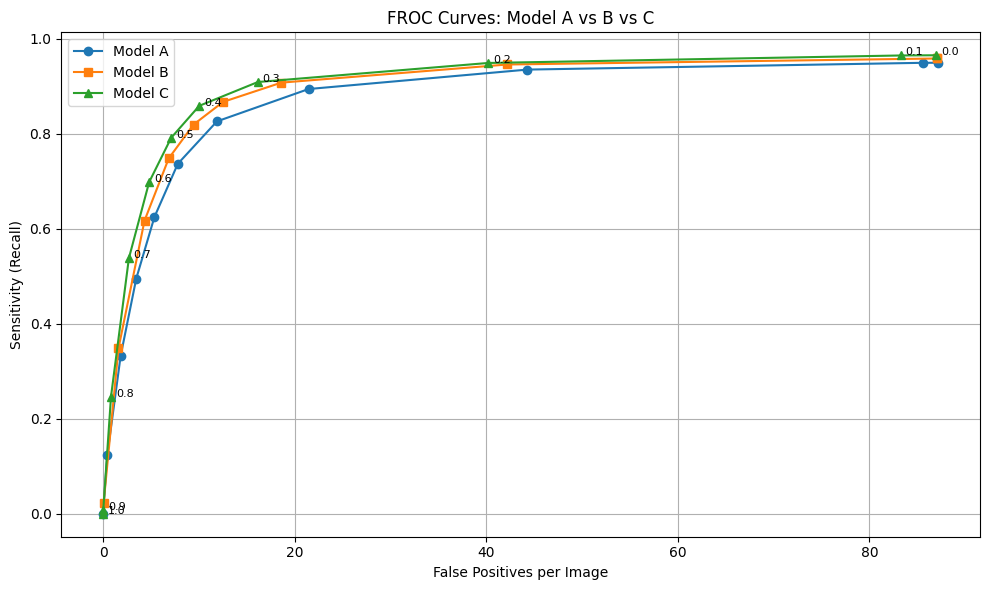

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Load FROC data
with open("C:\\Users\\luukn\\AIMI_MONKEY2\\monkey-training\\results\\Model A\\FROC_modelA.pkl", "rb") as f:
    frocA = pickle.load(f)
with open("C:\\Users\\luukn\\AIMI_MONKEY2\\monkey-training\\results\\Model B\\FROC_modelB.pkl", "rb") as f:
    frocB = pickle.load(f)
with open("C:\\Users\\luukn\\AIMI_MONKEY2\\monkey-training\\results\\Model C\\FROC_modelC.pkl", "rb") as f:
    frocC = pickle.load(f)

# Helper function to extract values
def extract_froc_data(froc):
    sensitivities = [r['sensitivity'] for r in froc]
    fps_per_image = [r['fp_per_image'] for r in froc]
    thresholds = [r['threshold'] for r in froc]
    return fps_per_image, sensitivities, thresholds

# Extract data
fpsA, sensA, _ = extract_froc_data(frocA)
fpsB, sensB, _ = extract_froc_data(frocB)
fpsC, sensC, threshC = extract_froc_data(frocC)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpsA, sensA, marker='o', label='Model A')
plt.plot(fpsB, sensB, marker='s', label='Model B')
plt.plot(fpsC, sensC, marker='^', label='Model C')

# Annotate thresholds for Model C only
for x, y, t in zip(fpsC, sensC, threshC):
    plt.text(x + 0.5, y, f"{t:.1f}", fontsize=8)

# Labels and legend
plt.xlabel('False Positives per Image')
plt.ylabel('Sensitivity (Recall)')
plt.title('FROC Curves: Model A vs B vs C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('FROC_Comparison.png')
plt.show()

AUFROC Model A: 76.4299
AUFROC Model B: 77.8788
AUFROC Model C: 78.7501


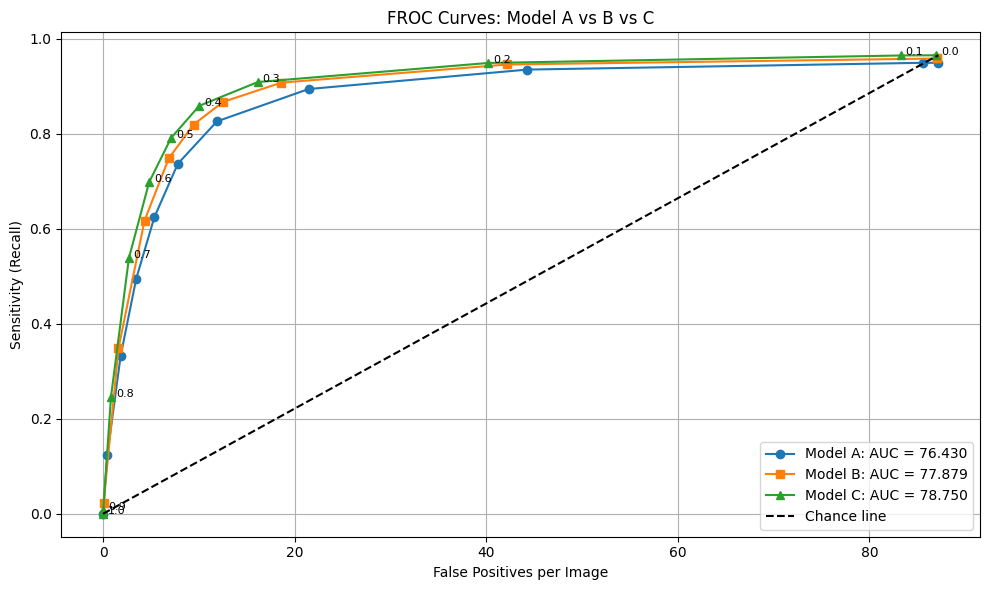

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load FROC data
with open("C:\\Users\\luukn\\AIMI_MONKEY2\\monkey-training\\results\\Model A\\FROC_modelA.pkl", "rb") as f:
    frocA = pickle.load(f)
with open("C:\\Users\\luukn\\AIMI_MONKEY2\\monkey-training\\results\\Model B\\FROC_modelB.pkl", "rb") as f:
    frocB = pickle.load(f)
with open("C:\\Users\\luukn\\AIMI_MONKEY2\\monkey-training\\results\\Model C\\FROC_modelC.pkl", "rb") as f:
    frocC = pickle.load(f)

# Helper function to extract and sort FROC data
def extract_froc_data(froc):
    sensitivities = [r['sensitivity'] for r in froc]
    fps_per_image = [r['fp_per_image'] for r in froc]
    thresholds = [r['threshold'] for r in froc]
    fps = np.array(fps_per_image)
    sens = np.array(sensitivities)
    sorted_indices = np.argsort(fps)
    return fps[sorted_indices], sens[sorted_indices], [thresholds[i] for i in sorted_indices]

# Extract and sort data
fpsA, sensA, _ = extract_froc_data(frocA)
fpsB, sensB, _ = extract_froc_data(frocB)
fpsC, sensC, threshC = extract_froc_data(frocC)

# Compute AUCs
aucA = np.trapz(sensA, fpsA)
aucB = np.trapz(sensB, fpsB)
aucC = np.trapz(sensC, fpsC)

# Print AUCs
print(f"AUFROC Model A: {aucA:.4f}")
print(f"AUFROC Model B: {aucB:.4f}")
print(f"AUFROC Model C: {aucC:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpsA, sensA, marker='o', label=f'Model A: AUC = {aucA:.3f}')
plt.plot(fpsB, sensB, marker='s', label=f'Model B: AUC = {aucB:.3f}')
plt.plot(fpsC, sensC, marker='^', label=f'Model C: AUC = {aucC:.3f}')

# Annotate thresholds for Model C
for x, y, t in zip(fpsC, sensC, threshC):
    plt.text(x + 0.5, y, f"{t:.1f}", fontsize=8)

# Add chance line (diagonal)
max_fp = max(np.max(fpsA), np.max(fpsB), np.max(fpsC))
max_sens = max(np.max(sensA), np.max(sensB), np.max(sensC))
plt.plot([0, max_fp], [0, max_sens], 'k--', label='Chance line')

# Finalize plot
plt.xlabel('False Positives per Image')
plt.ylabel('Sensitivity (Recall)')
plt.title('FROC Curves: Model A vs B vs C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('FROC_Comparison_with_AUC.png')
plt.show()
